# This is Heart Disease Prediction Project
we are going to predict based on the data whether someone have a heart disease or not

## BluePrint
1. Problem Definition
2. Data
3. Evaluate
4. Feature
5. Modelling
6. Experiment

## 1. Problem Definition
> Based on the given data we need to predict if a patient has heart disease or not

## 2. Data
> We have the data and have loaded it already

## 3. Evaluate
> In initial stages we need to make sure, if our model gives us the accuracy of over 95%

## 4. Features
> What features are important, what feature column means what
>
> - age=> age in years  
> - sex=> (1 = male; 0=female)  
> - cp=> chest pain type  
> - trestbps=> resting blood pressure (in mm Hg on admission to the hospital)  
> - chol=> serum cholestoral in mg/dl  
> - fbs=> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
> - restecg=> resting electrocardiographic results  
> - thalach=> maximum heart rate achieved  
> - exang=> exercise induced angina (1 = yes; 0 = no)  
> - oldpeak=> ST depression induced by exercise relative to rest  
> - slope=> the slope of the peak exercise ST segment  
> - ca=> number of major vessels (0-3) colored by flourosopy  
> - thal=> 3 = normal; 6 = fixed defect; 7 = reversable defect  
> - target=> 1 or 0  

### Tools Preperation

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Models of sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing Evaluation Libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Exploring the Data Initial Stage

1. What problem to be solved?
2. What kind of data is available?
3. Does this data has missing values?
4. Are there any Outliers, sporious vextors?
5. Can we add or remove some feature?

In [70]:
df = pd.read_csv('heart.csv')
df.shape

(1025, 14)

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [72]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


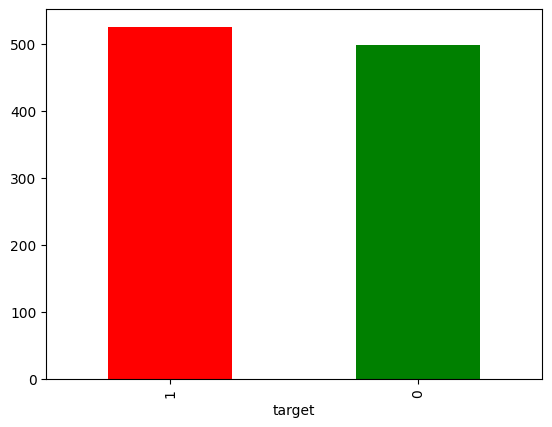

In [73]:
df['target'].value_counts().plot(kind='bar', color=['red', 'green']);

In [74]:
df.isna().sum() # Are there any missing values?

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [75]:
df.describe() # Statistical Summary of the Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


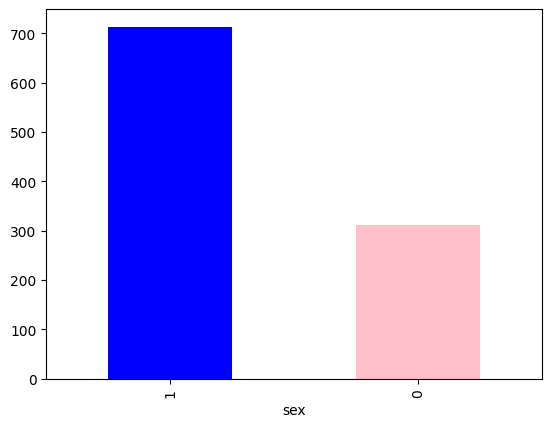

In [76]:
df.sex.value_counts().plot(kind='bar', color=['blue', 'pink']);

In [77]:
pd.crosstab(df.target, df.sex) # Comparing Sex of Patients with Target Variable

sex,0,1
target,,
0,86,413
1,226,300


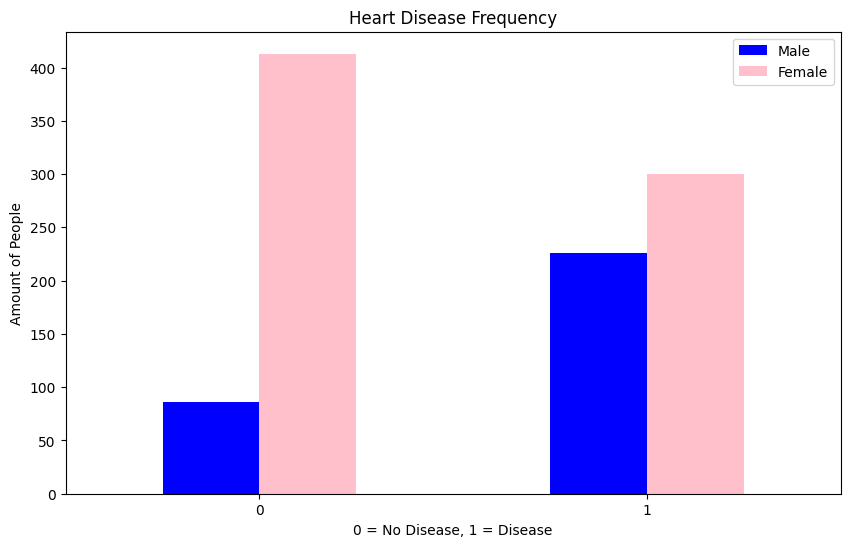

In [78]:
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10,6), color=['blue', 'pink'])
plt.title('Heart Disease Frequency')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount of People')
plt.legend(['Male','Female'])
plt.xticks(rotation=0);

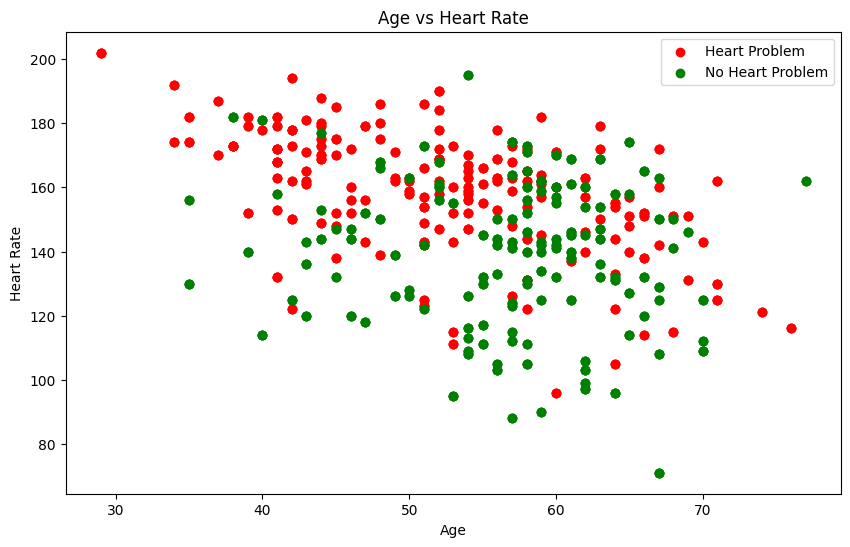

In [79]:
# Finding Patterns in Data using scatter Plot
plt.figure(figsize=(10,6))
# Creating scatter plot
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],c="red");
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],c="green");
plt.title('Age vs Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['Heart Problem', 'No Heart Problem'])

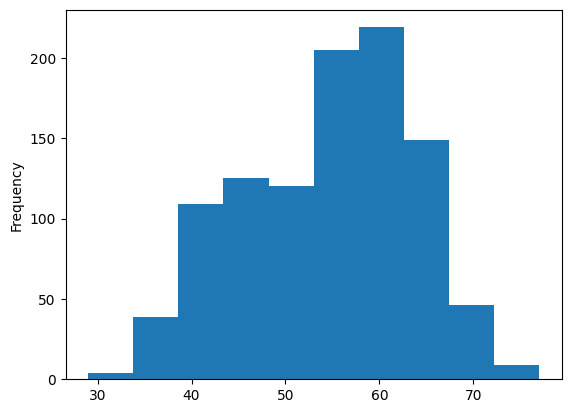

In [80]:
# Creating Histogram to see age distribution
df.age.plot.hist();

> cp: chest pain type
- Value 0: typical angina: Chest pain dues to decrease blood pressure
- Value 1: atypical angina: Chest Pain not related to Heart Problem
- Value 2: non-anginal pain: Not Heart Related
- Value 3: asymptomatic: Chst Paint not showing Heart Problem

In [81]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


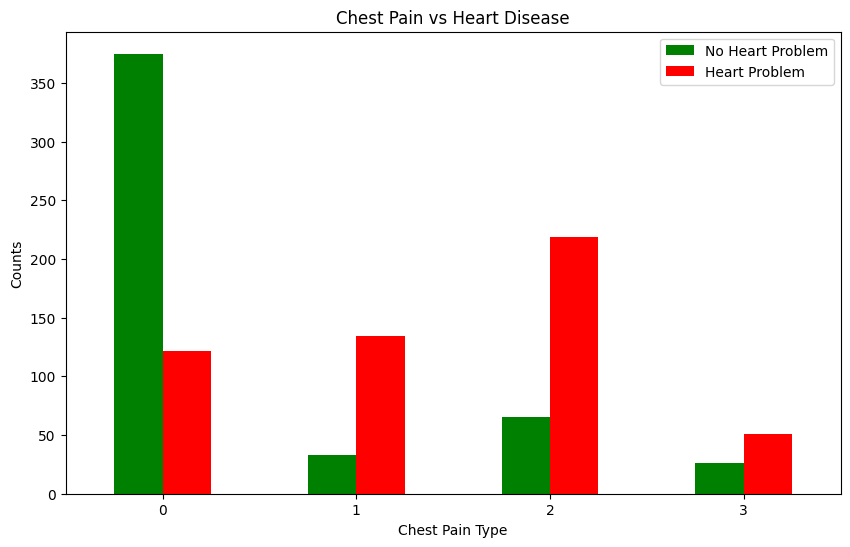

In [82]:
pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10,6), color= ['green', 'red'])
plt.title('Chest Pain vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Counts')
plt.legend(['No Heart Problem', 'Heart Problem'])
plt.xticks(rotation=0);

### Correlation Matrix

In [84]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


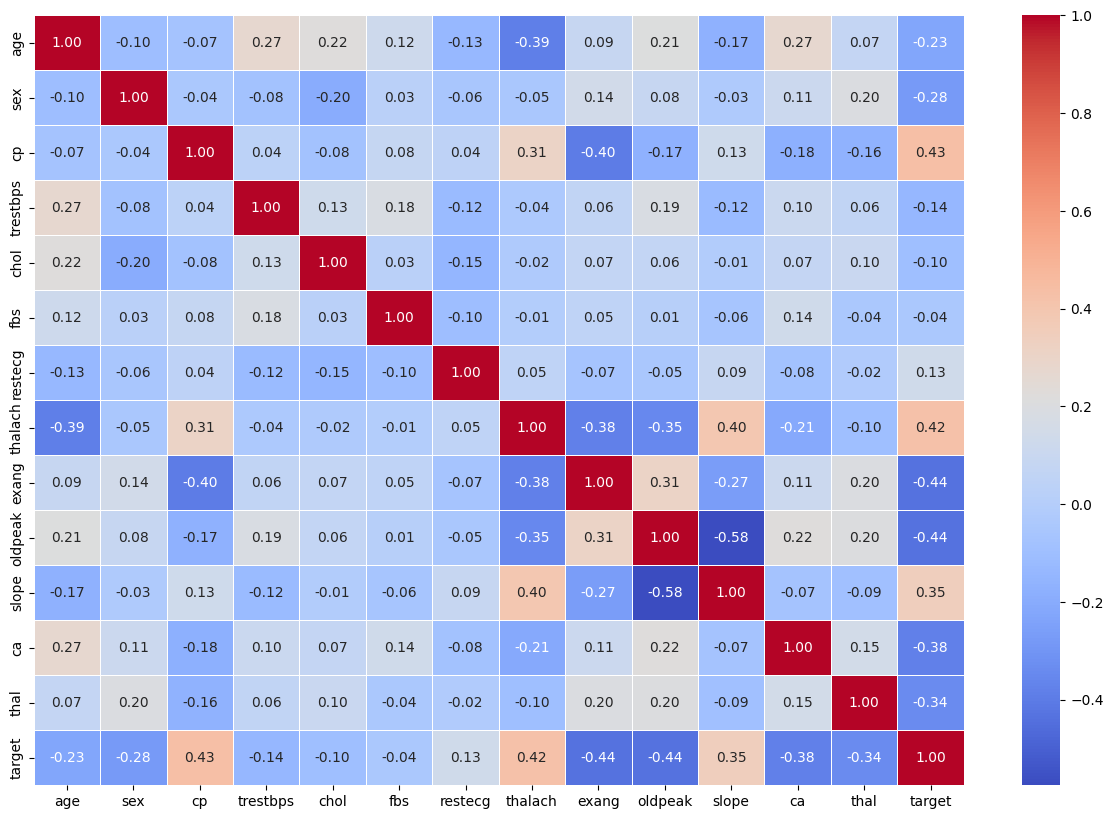

In [85]:
# Correlation Map

corr_map = df.corr()
canvas, plot = plt.subplots(figsize=(15,10))
plot = sns.heatmap(corr_map, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5);

## 5. Modeling

In [86]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [87]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


> Splitting data into test and train
> 

In [88]:
X = df.drop('target', axis=1)
y = df['target']

In [89]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [90]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [91]:
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [92]:
len(X_train)

820

### The Models we're going to use:
> 1. K-Nearest Neighbors Classifier  
> 2. Random Forest Classifier  
> 3. Logistic Regression

In [93]:
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(7)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [94]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

{'KNN': 0.7463414634146341,
 'Random Forest': 1.0,
 'Logistic Regression': 0.8780487804878049}

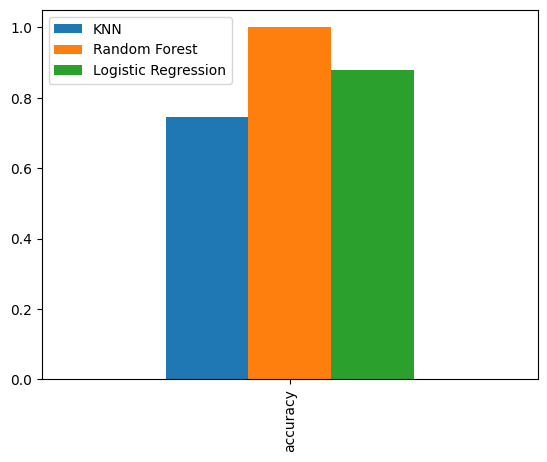

In [95]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.plot.bar();

### Improving and Tuning the Model
> Universal Methods for all Classifications Problems:  
> - Hyperparameter Tuning  
> - Feature Improving  
  
> Advanced Methods:  
> - Confusion Matrix  
> - Cross_Validation  
> - Precision  
> - Recall  
> - f1
> - Classification Report
> - Area Under the Curve

In [96]:
KNN = KNeighborsClassifier()
KNN.set_params()

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [97]:
train_score = []
test_score = []
# Create range to be tested for n_neighbors
neighbors = range(1,30)
for i in neighbors:
    KNN.set_params(n_neighbors=i)
    KNN.fit(X_train, y_train) # Fitting the model
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))

In [98]:
train_score

[1.0,
 0.9951219512195122,
 0.9902439024390244,
 0.9451219512195121,
 0.9182926829268293,
 0.8219512195121951,
 0.7951219512195122,
 0.7914634146341464,
 0.75,
 0.775609756097561,
 0.774390243902439,
 0.7560975609756098,
 0.7536585365853659,
 0.7353658536585366,
 0.751219512195122,
 0.7658536585365854,
 0.7621951219512195,
 0.7463414634146341,
 0.7329268292682927,
 0.7329268292682927,
 0.7292682926829268,
 0.7341463414634146,
 0.7414634146341463,
 0.7378048780487805,
 0.7463414634146341,
 0.7341463414634146,
 0.7414634146341463,
 0.7402439024390244,
 0.7451219512195122]

In [99]:
test_score

[0.9804878048780488,
 0.9414634146341463,
 0.9024390243902439,
 0.8,
 0.7463414634146341,
 0.7219512195121951,
 0.7317073170731707,
 0.7268292682926829,
 0.7414634146341463,
 0.7463414634146341,
 0.7121951219512195,
 0.7170731707317073,
 0.7170731707317073,
 0.7121951219512195,
 0.7463414634146341,
 0.7414634146341463,
 0.7317073170731707,
 0.7024390243902439,
 0.6829268292682927,
 0.6780487804878049,
 0.6731707317073171,
 0.6829268292682927,
 0.7268292682926829,
 0.7268292682926829,
 0.7463414634146341,
 0.7317073170731707,
 0.7317073170731707,
 0.7365853658536585,
 0.7365853658536585]

### Plotting the Accuracy Score

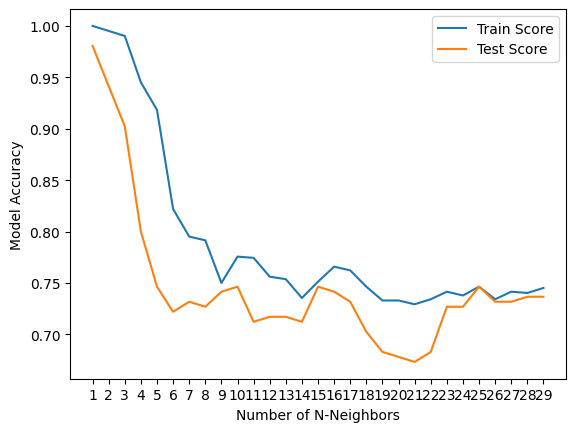

In [100]:
plt.plot(neighbors,train_score, label='Train Score')
plt.plot(neighbors,test_score, label='Test Score')
plt.xticks(np.arange(1,30,1))
plt.xlabel('Number of N-Neighbors')
plt.ylabel('Model Accuracy')
plt.legend();

In [101]:
print(f"Max KNN Score: {max(test_score)*100:0.2f}%")

Max KNN Score: 98.05%


### Hyperparameter tuning using Randomized Search CV
- LogisticRegression()
- RandomForestClassifier()

In [102]:
LR_hp = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}
RFC_hp = {
    'n_estimators': np.arange(10,1600,100),
    'max_depth': [None, 3,5,6,10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}

In [103]:
# Tuning Logistic Regression
np.random.seed(7)
LR_rs = RandomizedSearchCV(LogisticRegression(max_iter=1000),
                          param_distributions=LR_hp,
                          n_iter=20,
                          cv=5,
                          verbose=True)
LR_rs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegre...max_iter=1000)
,param_distributions,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [104]:
LR_rs.score(X_test, y_test)

0.8682926829268293

In [105]:
LR_rs.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [106]:
# Tuning Random Forest Classifier
np.random.seed(7)
rfc = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=RFC_hp,
                          n_iter=20,
                          cv=5,
                          verbose=True)
rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,RandomForestClassifier()
,param_distributions,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([ 1, 3..., 15, 17, 19]), 'min_samples_split': array([ 2, 4..., 14, 16, 18]), 'n_estimators': array([ 10, ..., 1410, 1510])}"
,n_iter,20
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [107]:
rfc.score(X_test, y_test)

0.9317073170731708

In [108]:
rfc.best_params_

{'n_estimators': np.int64(910),
 'min_samples_split': np.int64(16),
 'min_samples_leaf': np.int64(1),
 'max_depth': 6}

### Hyperparameter Tuning using GridSearch CV

In [109]:
# Tuning Logistic Regression
np.random.seed(7)
LR_gs = GridSearchCV(LogisticRegression(max_iter=1000),
                          param_grid=LR_hp,
                          cv=5,
                          verbose=True)
LR_gs.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'C': array([1.0000...00000000e+04]), 'solver': ['liblinear']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [110]:
LR_gs.score(X_test, y_test)

0.8682926829268293

In [111]:
# Tuning Random Forest Classifier
np.random.seed(7)
RFC2_hp = {
    "n_estimators": np.arange(1,101,50),
    "max_depth": [None, 3,50],
    "min_samples_split": np.arange(2,8,2),
    "min_samples_leaf": np.arange(1,7,2)
}
rfc_gs = GridSearchCV(RandomForestClassifier(),
                          param_grid=RFC2_hp,
                          cv=5,
                          verbose=True)
rfc_gs.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 3, ...], 'min_samples_leaf': array([1, 3, 5]), 'min_samples_split': array([2, 4, 6]), 'n_estimators': array([ 1, 51])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,np.int64(51)


In [112]:
rfc_gs.score(X_test, y_test)

0.9902439024390244

In [113]:
rfc_gs.best_params_

{'max_depth': 50,
 'min_samples_leaf': np.int64(1),
 'min_samples_split': np.int64(6),
 'n_estimators': np.int64(51)}